<a href="https://colab.research.google.com/github/CodeByAbi/Rainfall-Prediction-in-Australia/blob/main/Rainfall_Prediction_In_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rainfall Prediction In Australia**

**Problem Statement**

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

**Import Required Libraries**

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [3]:
df = pd.read_csv('/content/weatherAUS.csv')

In [4]:
# lets check the shape of dataset
df.shape

(145460, 23)

In [5]:
# Lets check the first five rows of dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
# Let's get an overview of features datatype
df.dtypes

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


# Data Description



*   **Date** is presented in a format yyyy-mm-dd, and Location indicates Australian cities where the weather conditions were recorded.


*   **MinTemp** and **MaxTemp** stand for minimum and maximum temperature for each day.

*   **Temp9am** and **Temp3pm** stand for temperature(degrees Celsius) in the morning and in the evening repectively.

*   **Rainfall** is measured in mm, and it is considered to be raining if the value of rainfall indicator is 1 mm or more.
*   **Evaporation** is measured in mm.


*   **Sunshine** stands for duration of bright sunshine in the 24 hours to midnight, measured in hours.


*   **WindGustDir**, **WindGustSpeed**, **WindDir9am**, **WindDir3pm**, **WindSpeed9am**, WindSpeed3pm indicate direction (categorical value) and speed of wind (measured in km/h).

*   **Humidity9am**, **Humidity3pm** indicates humidity, measured in percent.

*   **Pressure9am**, **Pressure3pm** indicate atmospheric pressure, measured in hectopascals.
*   **Cloud9am**, **Cloud3pm** seem to indicate cloud level, measured as fraction of sky obscured by cloud.


*   **RainToday** indicates whether it is rain today or not.




*   **RainTomorrow** consists of target values.

























In [7]:
# Lets check the missing values if any
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


We can clearly see that there are lots of missing values in a dataset which we'll have to fill or drop to start the further analysis.

# **EDA & Data Cleaning**

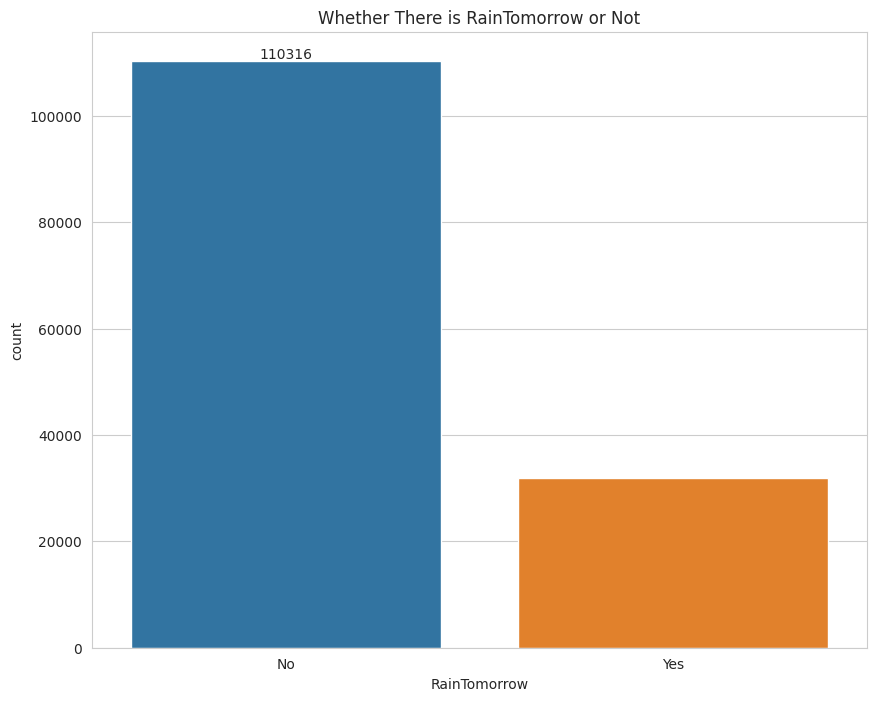

In [8]:
# Atur ukuran gambar
plt.figure(figsize=(10,8))

# Plot countplot dengan warna khusus dan penambahan titik
ax = sns.countplot(data=df, x='RainTomorrow', palette=['#1f77b4', '#ff7f0e'])
plt.title('Whether There is RainTomorrow or Not')

# Menambahkan titik pada batang
ax.bar_label(ax.containers[0])

# Tampilkan plot
plt.show()


**Analysis of Continuous Features**

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features Count {}".format(len(numerical_features)))
print("Discrete features Count {}".format(len(discrete_features)))
print("Continuous features Count {}".format(len(continuous_features)))
print("Categorical features Count {}".format(len(categorical_features)))
print("Binary Categorical features Count {}".format(len(binary_categorical_features)))

Numerical Features Count 16
Discrete features Count 2
Continuous features Count 14
Categorical features Count 7
Binary Categorical features Count 2


In [10]:
def generate_distribution_plot(df, continuous_features):
    # create copy of dataframe
    data = df[continuous_features].copy()
    # Create subplots
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,20))
    fig.subplots_adjust(hspace=0.7)

    # set fontdict
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        sns.distplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='-', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='-', label="Mode")
        ax.legend()
    plt.show()

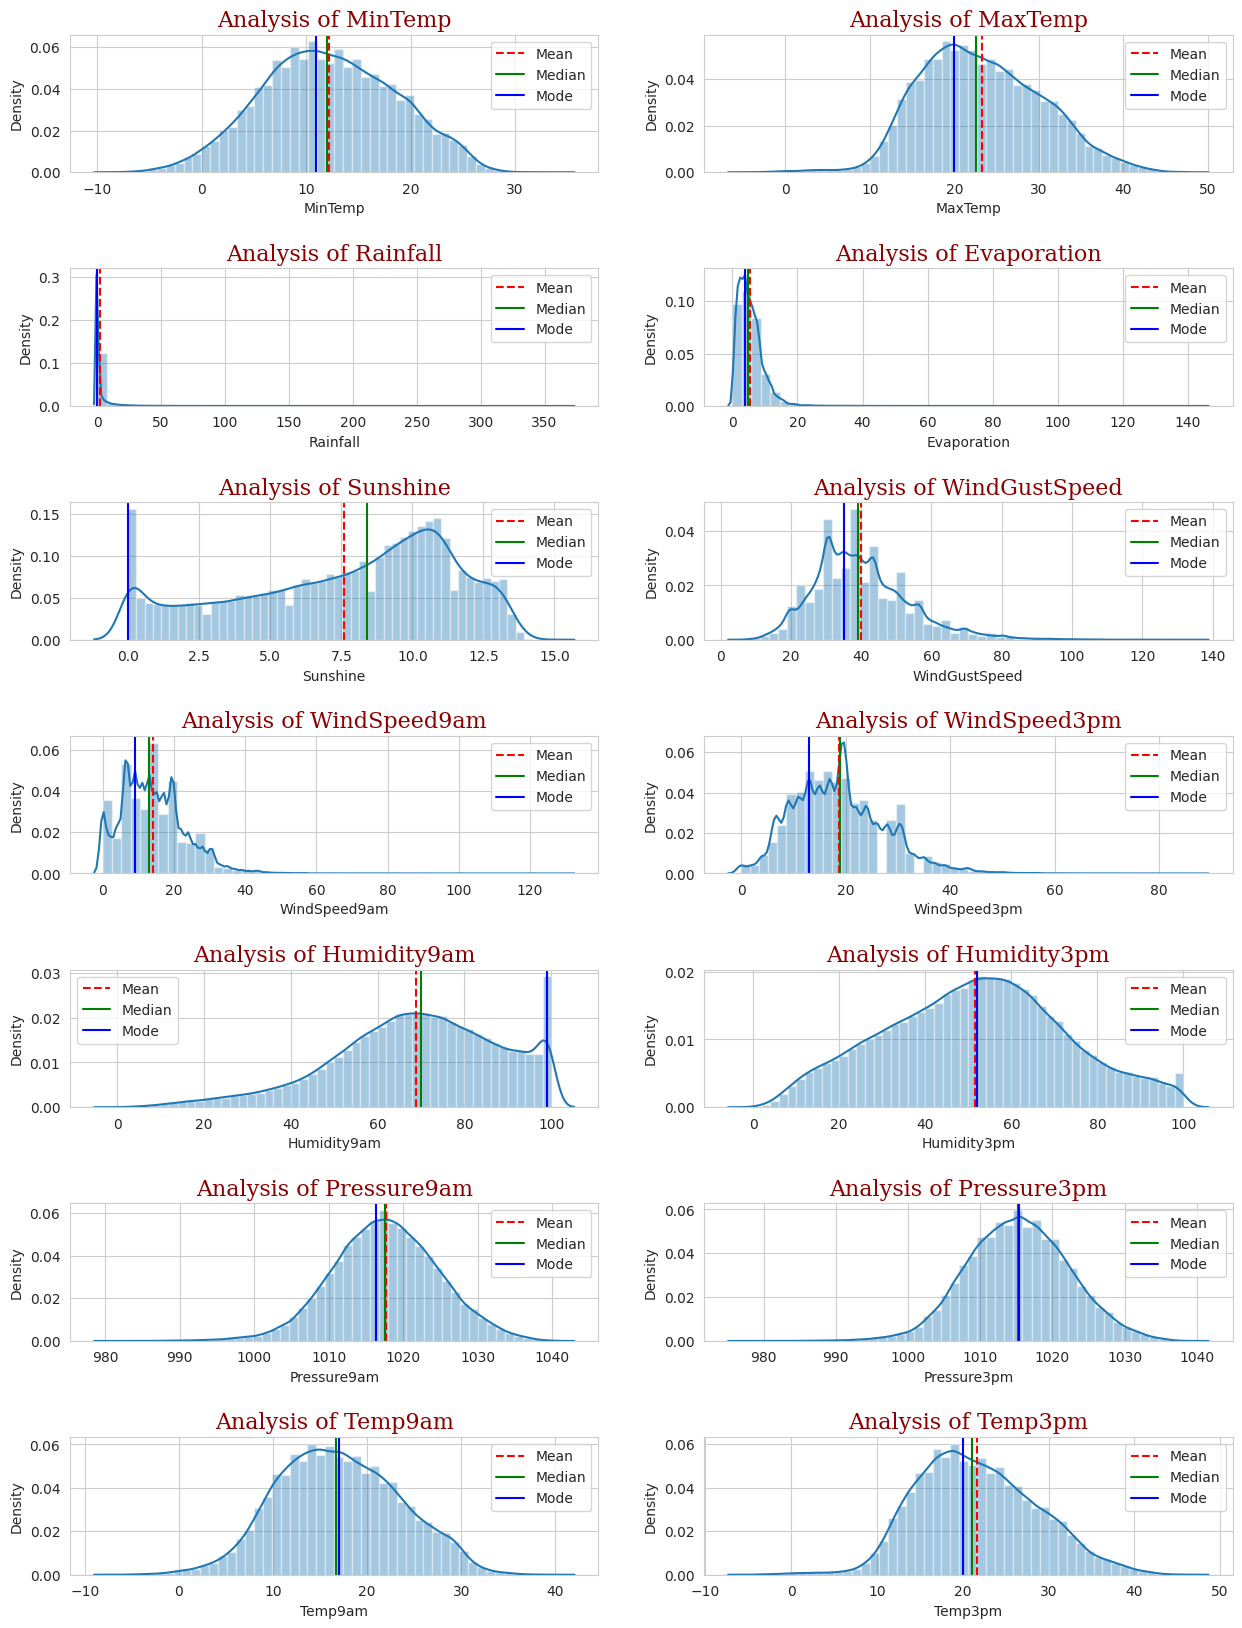

In [11]:
generate_distribution_plot(df, continuous_features)

In [12]:
sample_imputation_features = [col for col in df.columns if (df.isnull().sum()[col] > 50000)]

In [13]:
# Random Sampling for high number of missing values features-
def randomsampleimputation(df, columns):
    data = df.copy()
    for column in columns:
        random_sample = data[column].dropna().sample(data[column].isnull().sum(),random_state=2022)
        random_sample.index = data[data[column].isnull()].index
        data.loc[data[column].isnull(),column] = random_sample
    return data

In [14]:
df = randomsampleimputation(df,sample_imputation_features)

In [15]:
# list of numeric features with null values
missing_values_numeric_features  = [col for col in df.columns if (df.isnull().sum()[col] > 0) & (df[col].dtypes != 'object')]

In [16]:
# Filling the Missing Values – Imputation
# Filling the missing data with the mean value for a numerical variable


# function for missing values substitution
def impute_means(df, missing_values_columns):
    data = df.copy()
    '''Filling missing values with mean'''
    for col in missing_values_columns:
        data[col] = data[col].fillna(data[col].mean())

    return data

In [17]:
# lets use this function to fill the missing values
df = impute_means(df,missing_values_numeric_features)

In [18]:
# checking the missing values again
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,10326
WindGustSpeed,0
WindDir9am,10566


OnehotEncoding handles null values very cleverly so we will use get_dummies function from pandas to handle null values and convert the data into proper format to use machine learning model.

In [19]:
def plot_boxplot(df, continuous_features):
    # create copy of dataframe
    data = df[continuous_features].copy()
    # Create subplots
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,20))
    fig.subplots_adjust(hspace=0.7)

    # set fontdict
    font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

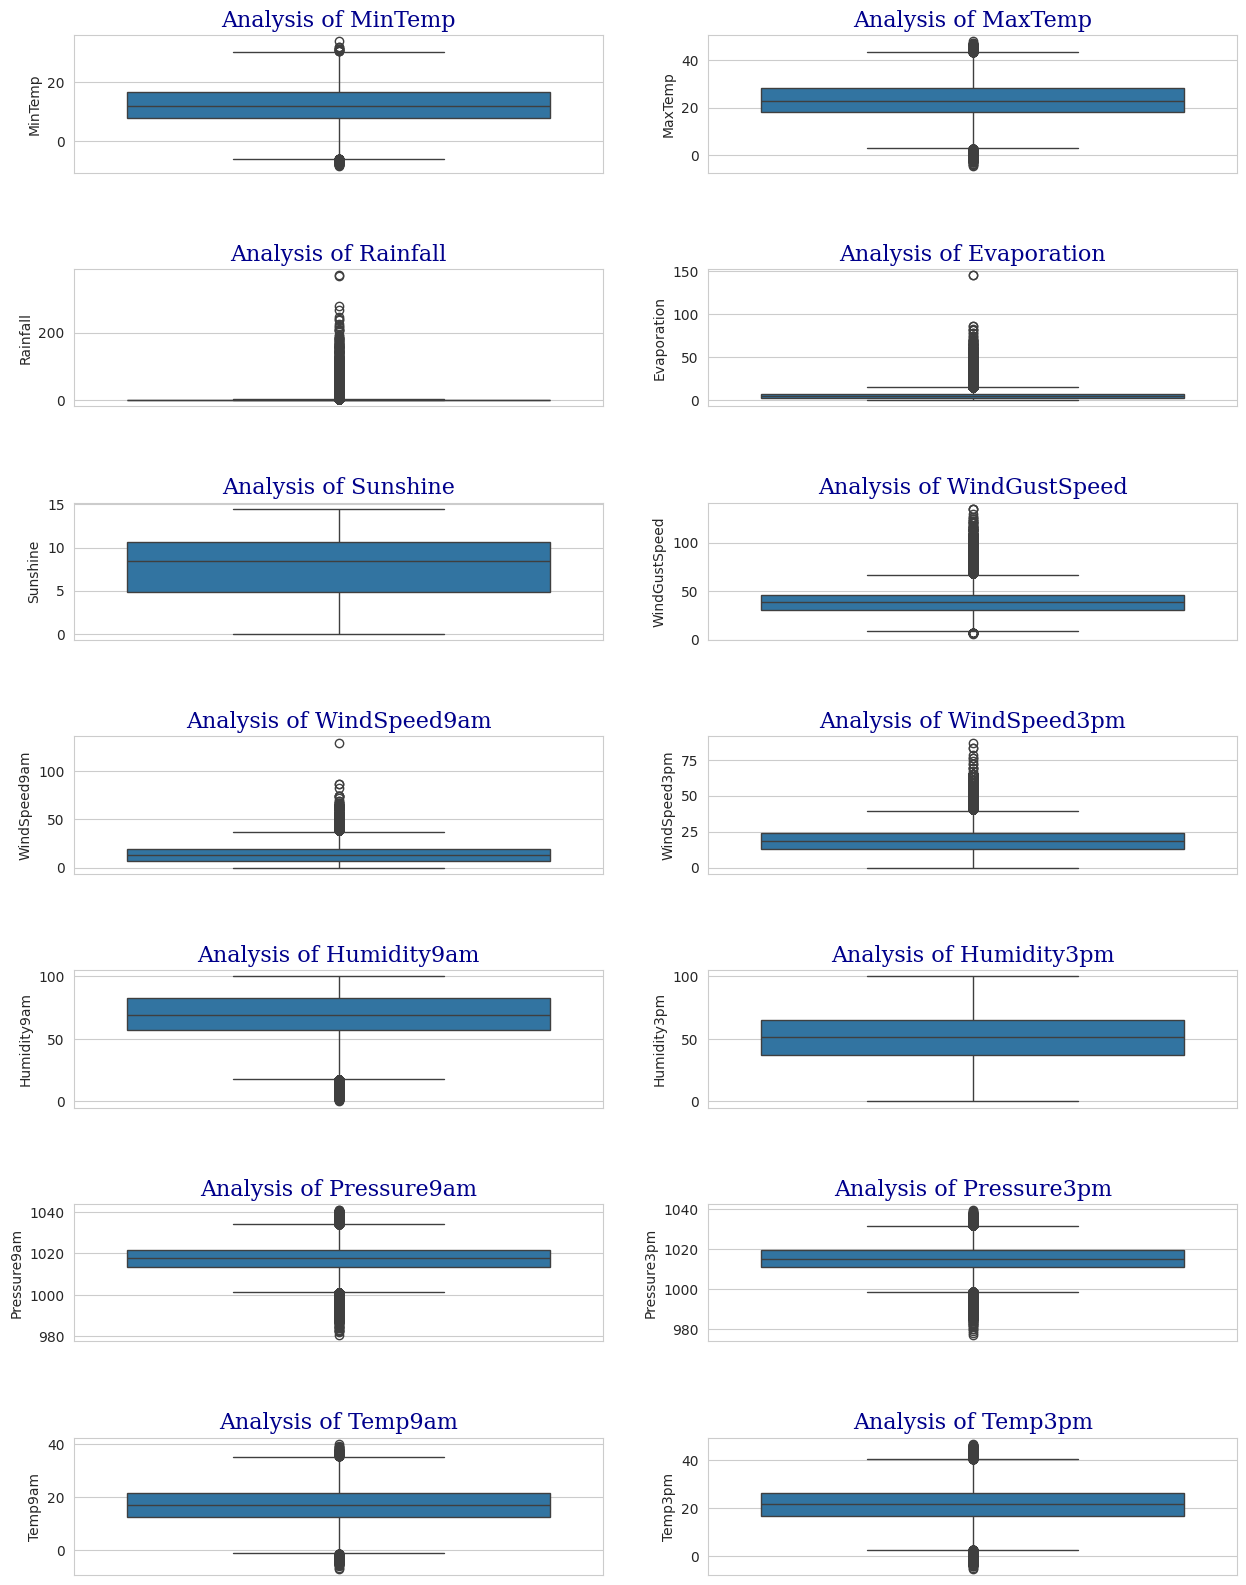

In [20]:
plot_boxplot(df, continuous_features)

In [21]:
outliers_features = [feature for feature in continuous_features if feature not in ['Sunshine','Humidity3pm']]
print(outliers_features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [22]:
def remove_outliers(df,outliers_features):
    # create copy of dataframe

    data = df.copy()

    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
#         data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data

In [23]:
df = remove_outliers(df,outliers_features)

In [24]:
df.shape

(145460, 23)

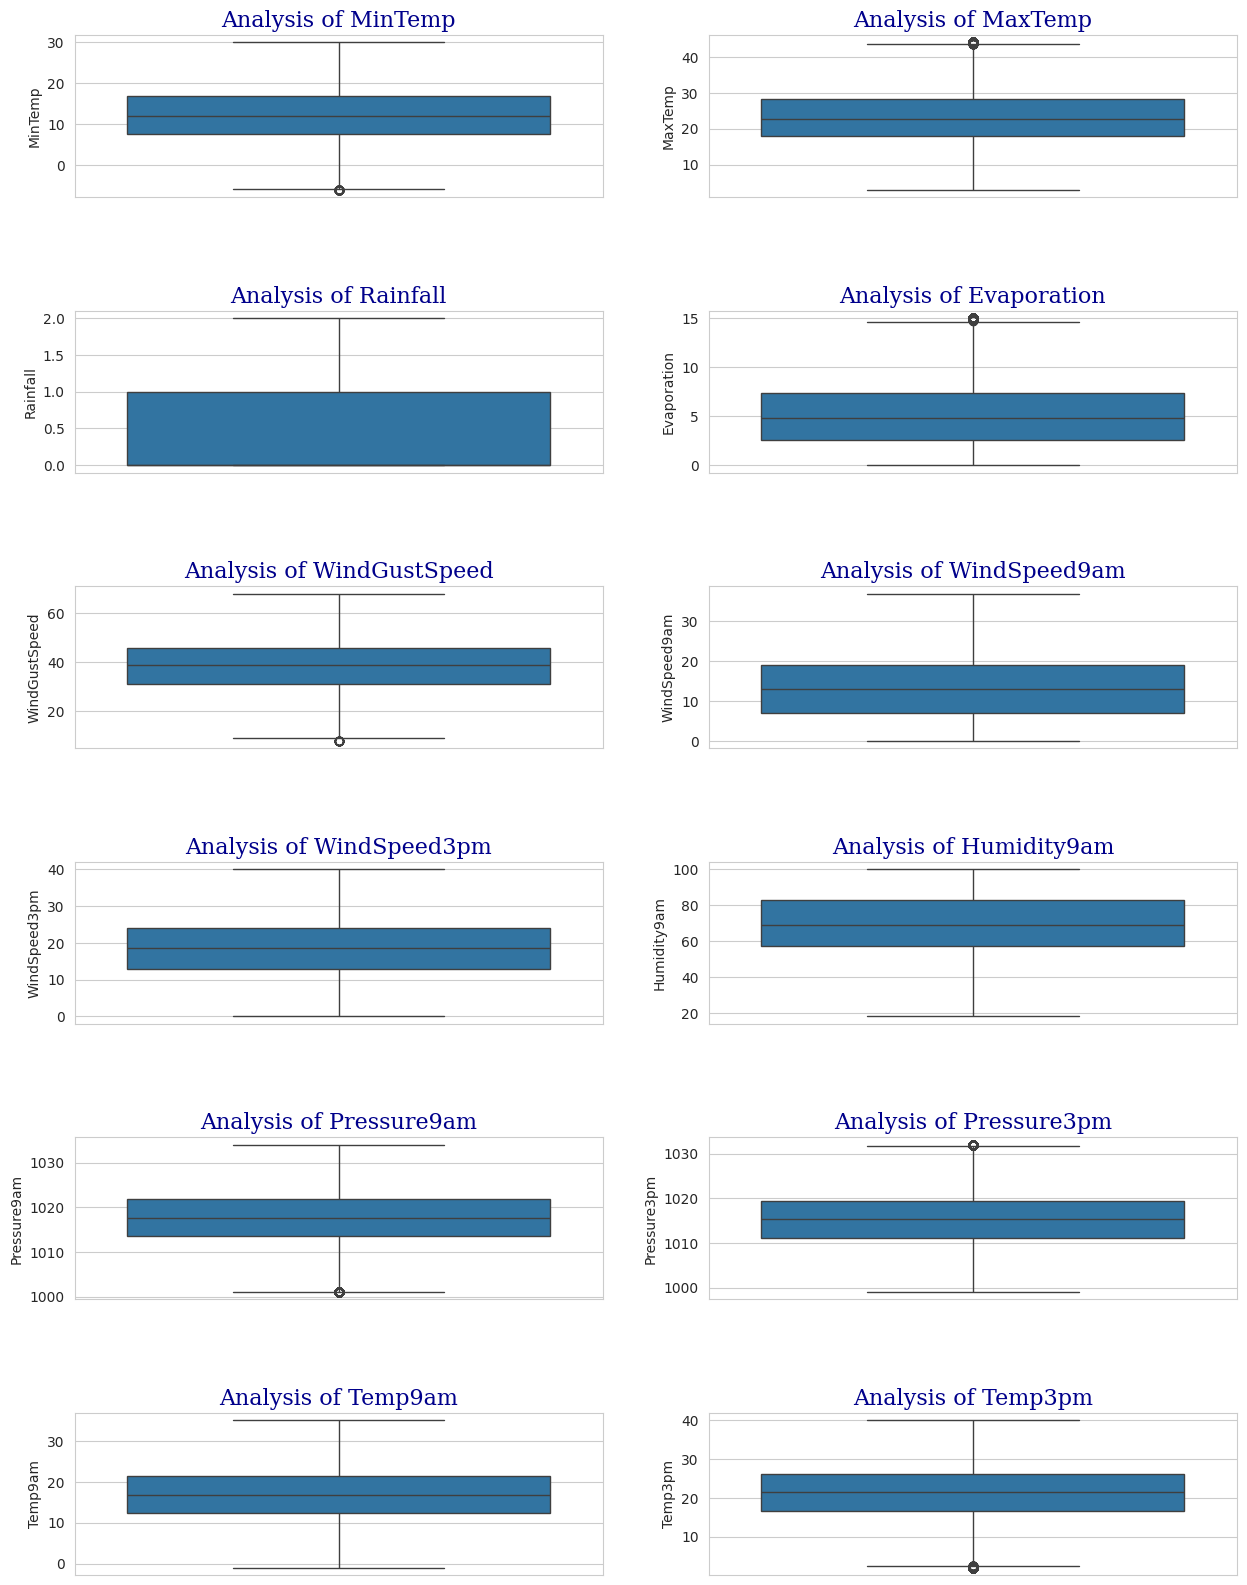

In [25]:
plot_boxplot(df, outliers_features)

In [26]:
# Raintoday
df['RainToday'] = df['RainToday'].fillna('No')
# Raintomorrow
df['RainTomorrow'] = df['RainTomorrow'].fillna('No')

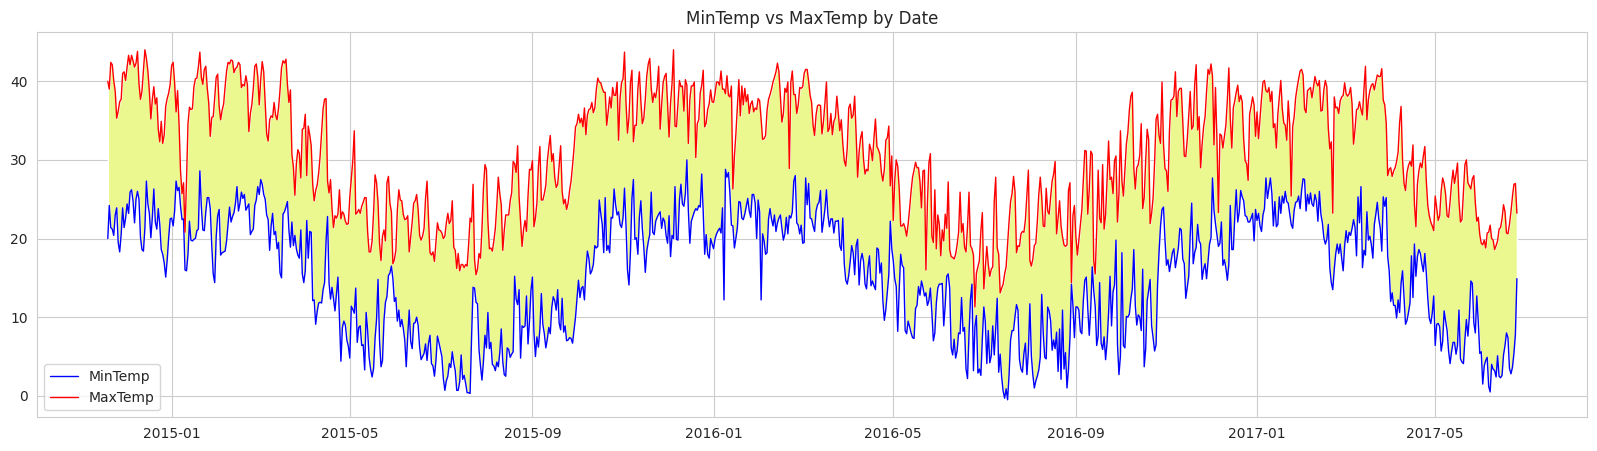

In [27]:
df["Date"] = pd.to_datetime(df["Date"])
# using data from last 3 years.
df_last_3_years = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_last_3_years['Date'],df_last_3_years['MinTemp'],color='blue',linewidth=1, label= 'MinTemp')
plt.plot(df_last_3_years['Date'],df_last_3_years['MaxTemp'],color='red',linewidth=1, label= 'MaxTemp')
plt.fill_between(df_last_3_years['Date'],df_last_3_years['MinTemp'],df_last_3_years['MaxTemp'], facecolor = '#EBF78F')
plt.title('MinTemp vs MaxTemp by Date')
plt.legend(loc='lower left')
plt.show()



*   Above plot shows that the MinTemp and MaxTemp relatively increases and decreases every year. As you can see that, December to February is summer; March to May is autumn; June to August is winter; and September to November is spring.
*   The weather conditions are always opposite in the two hemispheres. As, the Australia is situated in the southern hemisphere. The seasons are bit different.



The weather conditions are always opposite in the two hemispheres. As, the Australia is situated in the southern hemisphere. The seasons are bit different.

**Handling DateTime Feature**

In [28]:
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

# We don't need date feature anymore for model building
df.drop('Date', axis=1, inplace=True)

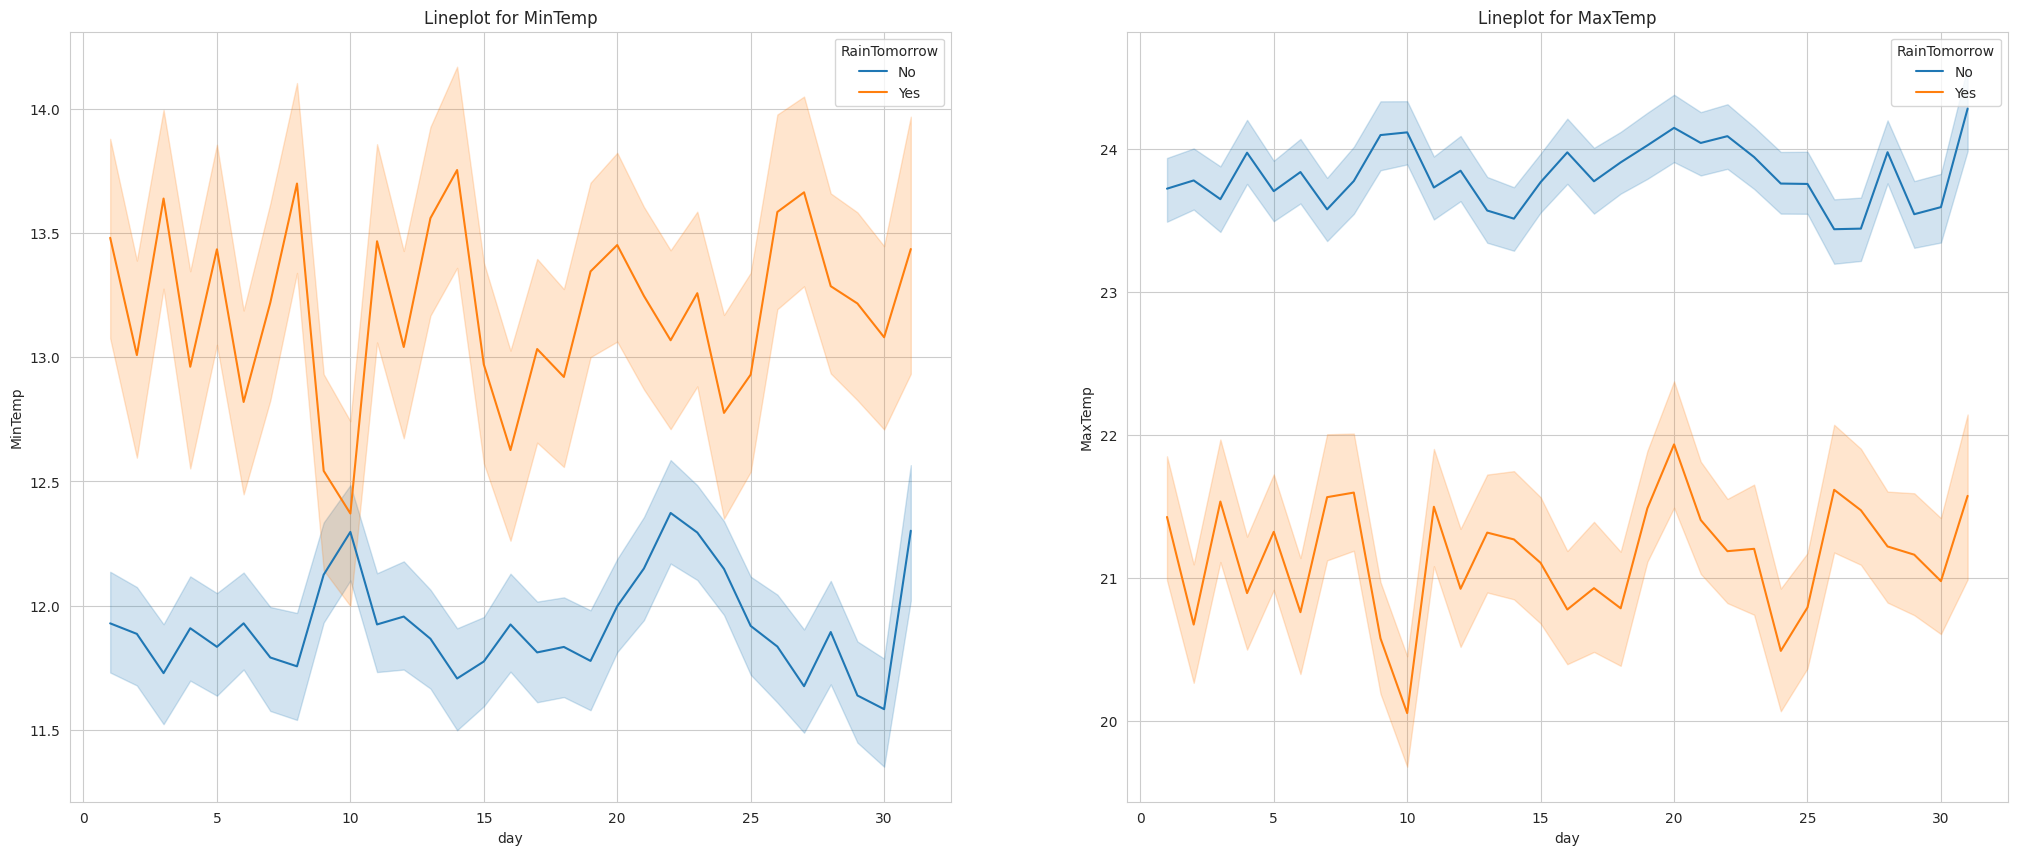

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))

# Mintemp
sns.lineplot(ax=axes[0],x="day",y="MinTemp",hue="RainTomorrow",data=df)
axes[0].set_title('Lineplot for MinTemp')
# Maxtemp
sns.lineplot(ax=axes[1],x="day",y="MaxTemp",hue="RainTomorrow",data=df)
axes[1].set_title('Lineplot for MaxTemp')
plt.show()

If temperature difference between min and max temperature is low then probality of rain occuring tomorrow is more.

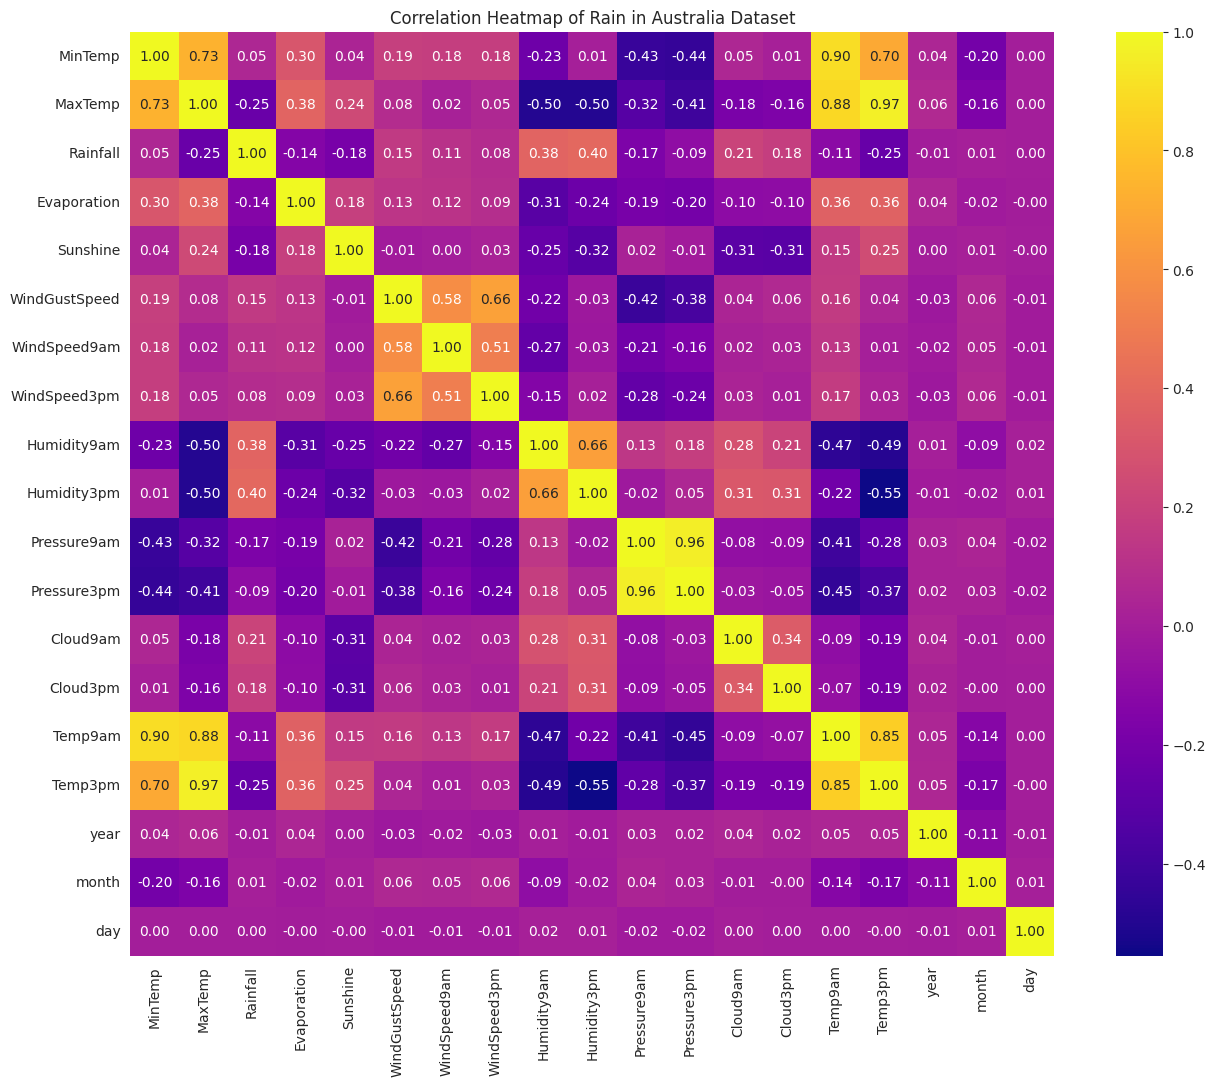

In [30]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Check correlation on numeric-only DataFrame
corrmat = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corrmat, square=True, annot=True, fmt='.2f', linecolor='white', cmap='plasma')
plt.title('Correlation Heatmap of Rain in Australia Dataset')
plt.show()


# **Feature Engineering**

**LabelEncoding For Binary Features**

In [32]:
# For binary features, we'll use labelencoding
le = LabelEncoder()

label_encoder_columns = ['RainToday', 'RainTomorrow']

for col in label_encoder_columns:
    df[col] = le.fit_transform(df[col])

In [33]:
# let's check the head again
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,3.2,9.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,8.0,16.9,21.8,0,0,2008,12,1
1,Albury,7.4,25.1,0.0,3.0,10.8,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,4.0,17.2,24.3,0,0,2008,12,2
2,Albury,12.9,25.7,0.0,8.0,10.1,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,2008,12,3
3,Albury,9.2,28.0,0.0,15.0,6.1,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,3.0,18.1,26.5,0,0,2008,12,4
4,Albury,17.5,32.3,1.0,9.0,8.5,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


**OneHotEncoding for Categorical Features**

In [34]:
# creating list of categorical columns for one hot encoding
categorical_columns = [col for col in df.columns if df.dtypes[col] == 'object']
print('Categorical Features are : ',categorical_columns)

Categorical Features are :  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [35]:
# one hot encoding function for categorical features
def onehot_encoder(df, cols):
    data = df.copy()
    for col in cols:
        dummies = pd.get_dummies(data[col],drop_first=True,prefix=col)
        # concatenating dummies and original dataframe
        data = pd.concat([data, dummies], axis=1)

        # dropping original columns for which encoding is applied.
        data.drop(col, axis=1,inplace=True)
    return data

In [36]:
# Apply onehotencoder on categorical features
df = onehot_encoder(df,categorical_columns)

In [37]:
# Dataframe shape after data preprocessing
df.shape

(145460, 114)

In [38]:
# Now,lets check missing values again
df.isnull().sum().sum()

0

**Model Building**

In [39]:
# splitting the data into X and y
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [40]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

In [41]:
# Scaling Numerical Features

sc = RobustScaler()

X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

**Model Building**

In [42]:
def build_model(num_features=X.shape[1], hidden_layer_sizes=(16, 8)):
    # Adding Input layer
    inputs = Input(shape=(num_features,))
    # Adding dense layer
    x = Dense(hidden_layer_sizes[0], activation='relu')(inputs)
    # Adding dense layer again
    x = Dense(hidden_layer_sizes[1], activation='relu')(x)
    # Adding output layer
    outputs = Dense(2, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    # compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [43]:
# Apply build_model
model = build_model()

In [44]:
# checking model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 113)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,978 (7.73 KB)

 Trainable params: 1,978 (7.73 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8128 - loss: 0.4078 - val_accuracy: 0.8506 - val_loss: 0.3504
Epoch 2/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8511 - loss: 0.3468 - val_accuracy: 0.8523 - val_loss: 0.3407
Epoch 3/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8561 - loss: 0.3358 - val_accuracy: 0.8560 - val_loss: 0.3360
Epoch 4/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8579 - loss: 0.3300 - val_accuracy: 0.8558 - val_loss: 0.3338
Epoch 5/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8588 - loss: 0.3274 - val_accuracy: 0.8544 - val_loss: 0.3337
Epoch 6/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8637 - loss: 0.3200 - val_accuracy: 0.8562 - val_loss: 0.3303
Epoch 7/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8625 - loss: 0.3207 - val_accuracy: 0.8583 - val_loss: 0.3290
Epoch 8/10
2910/2910 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8626 - loss: 0.3177 

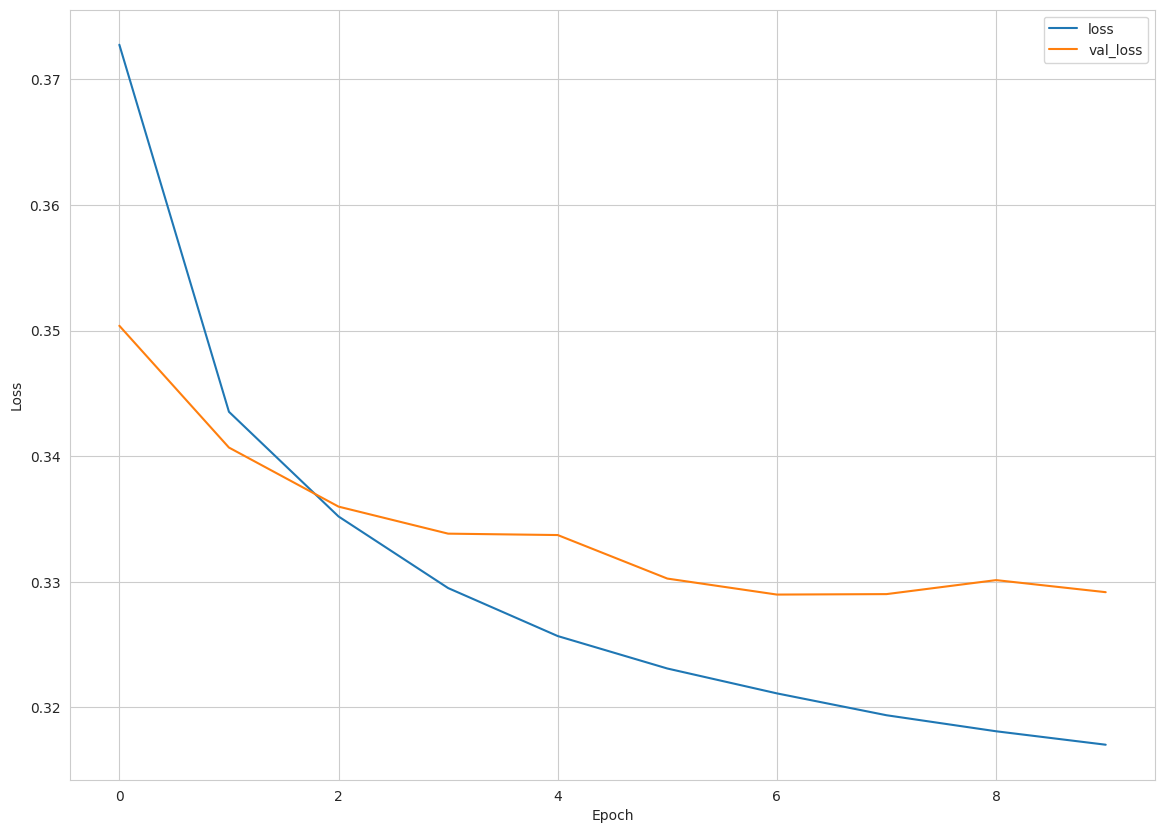

In [46]:
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot(figsize=(14, 10))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**Predictions**

In [47]:
predictions = model.predict(X_test)

910/910 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [48]:
y_pred = list(map(lambda x: np.argmax(x), predictions))

**Result**

In [49]:
print(f"Model Accuracy: {model.evaluate(X_test, y_test, verbose=0)[1]}")

Model Accuracy: 0.857761561870575


In [50]:
print(f"Model roc_auc_score: {roc_auc_score(y_test, y_pred)}")

Model roc_auc_score: 0.744351112961542


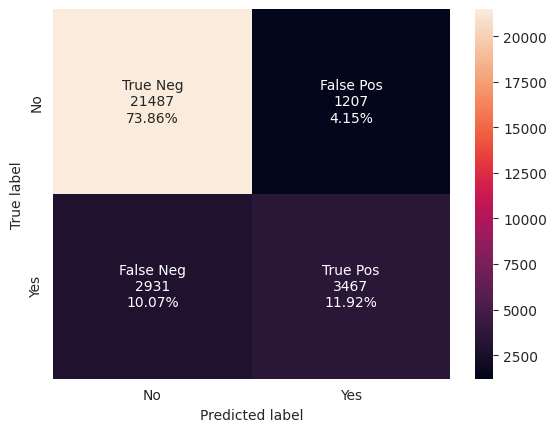

In [51]:
cm = confusion_matrix(y_test,y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

categories = ['No','Yes']


sns.heatmap(cm, annot=labels, fmt='',xticklabels=categories,yticklabels=categories)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [52]:
print(f"Classification Report:\n {classification_report(y_test,y_pred)}")

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     22694
           1       0.74      0.54      0.63      6398

    accuracy                           0.86     29092
   macro avg       0.81      0.74      0.77     29092
weighted avg       0.85      0.86      0.85     29092

